# Loading data from JSON file

JSON (JavaScript Object Notation) is a lightweight data-interchange format. JSON files are easy for humans to read and write and at the same time also easy for machines to parse and generate. A lot of data from API are packaged as JSONs so it is important to learn how to load data in JSON format.

## Import modules

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json
from pandas.io.json import json_normalize

## Loading JSON files

There are different ways of loading data in JSON format. One way is to use Pandas to directly read the file.

In [76]:
df = pd.read_json('data/world_bank_projects.json')
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


Another way is to load the JSON file as string first and then populate table from string.

In [77]:
data = json.load((open('data/world_bank_projects.json')))

In [78]:
data[0]

{'sector': [{'Name': 'Primary education'},
  {'Name': 'Secondary education'},
  {'Name': 'Public administration- Other social services'},
  {'Name': 'Tertiary education'}],
 'supplementprojectflg': 'N',
 'projectfinancialtype': 'IDA',
 'prodline': 'PE',
 'mjtheme': ['Human development'],
 'idacommamt': 130000000,
 'impagency': 'MINISTRY OF EDUCATION',
 'project_name': 'Ethiopia General Education Quality Improvement Project II',
 'mjthemecode': '8,11',
 'closingdate': '2018-07-07T00:00:00Z',
 'totalcommamt': 130000000,
 'id': 'P129828',
 'mjsector_namecode': [{'code': 'EX', 'name': 'Education'},
  {'code': 'EX', 'name': 'Education'},
  {'code': 'BX', 'name': 'Public Administration, Law, and Justice'},
  {'code': 'EX', 'name': 'Education'}],
 'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
 'sector1': {'Percent': 46, 'Name': 'Primary education'},
 'lendinginstr': 'Investment Project Financing',
 'countrycode': 'ET',
 'sector2': {'Percent': 26

****
## JSON exercise

Let's try to use the file 'world_bank_projects.json' (which can be found in http://jsonstudio.com/resources/) and answer the below questions:

1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode'). 
3. In 2, notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## 1. Top 10 countries with most projects

In [79]:
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


Top 10 countries with the most projects are:

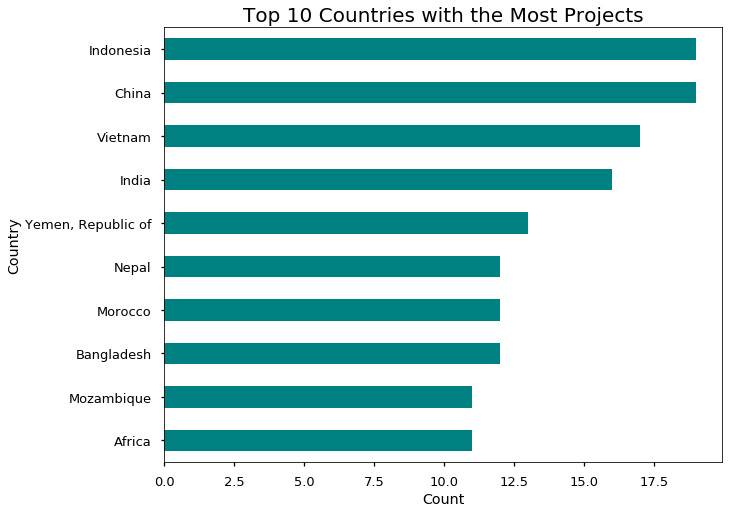

In [95]:
sns.set_context('talk')
plt.figure(figsize=(10, 8))
df.groupby('countryshortname').size().nlargest(10).sort_values().plot(kind='barh', color='teal')
plt.title('Top 10 Countries with the Most Projects', fontsize=20)
plt.ylabel('Country')
plt.xlabel('Count');

## 2 & 3. 10 major project themes

To answer question 2 & 3 we need to use 'mjtheme_namecode'. Since 'mjtheme_namecode' is a nested element, we need to use json_normalize to populate table from nested element.

In [15]:
data[0]

{'sector': [{'Name': 'Primary education'},
  {'Name': 'Secondary education'},
  {'Name': 'Public administration- Other social services'},
  {'Name': 'Tertiary education'}],
 'supplementprojectflg': 'N',
 'projectfinancialtype': 'IDA',
 'prodline': 'PE',
 'mjtheme': ['Human development'],
 'idacommamt': 130000000,
 'impagency': 'MINISTRY OF EDUCATION',
 'project_name': 'Ethiopia General Education Quality Improvement Project II',
 'mjthemecode': '8,11',
 'closingdate': '2018-07-07T00:00:00Z',
 'totalcommamt': 130000000,
 'id': 'P129828',
 'mjsector_namecode': [{'code': 'EX', 'name': 'Education'},
  {'code': 'EX', 'name': 'Education'},
  {'code': 'BX', 'name': 'Public Administration, Law, and Justice'},
  {'code': 'EX', 'name': 'Education'}],
 'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
 'sector1': {'Percent': 46, 'Name': 'Primary education'},
 'lendinginstr': 'Investment Project Financing',
 'countrycode': 'ET',
 'sector2': {'Percent': 26

In [61]:
df2 = json_normalize(data, 'mjtheme_namecode')

In [67]:
df2.head(10)

,code,name
0,8,Human development
1,11,NaN
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


We are seeing some blanks here in 'name' and they should be NaN instead. Let's replace these blanks with NaNs.

In [63]:
df2 = df2.replace(r'^\s*$', np.nan, regex=True)

In [68]:
df2.head(10)

,code,name
0,8,Human development
1,11,NaN
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [66]:
df2.isnull().sum()

code      0
name    122
dtype: int64

To fix these NaNs, we can look for their correct name using their codes from the same table as we can see there are with code == 11 but with a non NaN name.

To do so, we will first create a lookup table with the code and name mapping and then perform an outer join using df2 and the mapping table.

In [69]:
df_mapping = df2.dropna().drop_duplicates()

In [70]:
df_mapping.head()

,code,name
0,8,Human development
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance


In [71]:
df3 = df2.merge(df_mapping, on='code', how='left', suffixes=['_original', '_revised'])

In [72]:
df3.head()

,code,name_original,name_revised
0,8,Human development,Human development
1,11,NaN,Environment and natural resources management
2,1,Economic management,Economic management
3,6,Social protection and risk management,Social protection and risk management
4,5,Trade and integration,Trade and integration


In [73]:
df3.isnull().sum()

code               0
name_original    122
name_revised       0
dtype: int64

Now all the NaNs values are fixed. The 10 major project themes based on 'mjtheme_namecode' are:

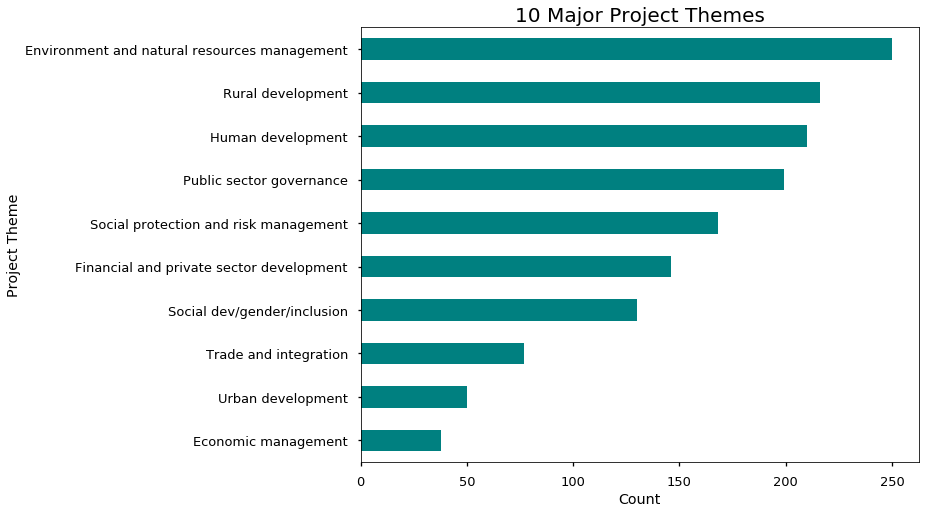

In [94]:
plt.figure(figsize=(10, 8))
df3.groupby('name_revised').size().nlargest(10).sort_values().plot(kind='barh', color='teal')
plt.title('10 Major Project Themes', fontsize=20)
plt.ylabel('Project Theme')
plt.xlabel('Count');